In [38]:
#Obtention de la population par région de 2014 à 2025 à partir d'un jeu de données Insee 
# https://catalogue-donnees.insee.fr/fr/catalogue/recherche/DS_ESTIMATION_POPULATION

#Il y a plusieurs étapes:
#1. Charger le dataset Insee
#2. Filtrer pour ne garder que les régions
#3. Ajouter une colonne avec le nom des régions à partir du code région
#4. Garder uniquement les colonnes population, région_nom et année
#5. Agréger les données pour obtenir la population totale par région et par année
#6. Sauvegarder le résultat dans un fichier CSV


In [39]:

# Chargement du DataFrame (exemple depuis un fichier CSV)
# Remplace 'ton_fichier.csv' par le chemin de ton fichier
import pandas as pd
df = pd.read_csv(r"C:/Users\thoma\OneDrive\Documents\ENSAE\2A\Python-pour-la-data-science\Projet\python_DS_2A\data\data_outdated\DS_ESTIMATION_POPULATION_data.csv", sep=';')


In [40]:
# Filtrage des données :
# - années entre 2014 et 2025 inclus
# - GEO_OBJECT contenant "REG"
df_filtered = df[
    (df['TIME_PERIOD'].between(2014, 2025)) &
    (df['GEO_OBJECT'].str.contains('REG'))
]

# Réinitialisation des index pour un DataFrame propre
df_filtered = df_filtered.reset_index(drop=True)

In [41]:
# document qui donne le nom des régions à partir du code région obtenu dans le dataset Insee
region=pd.read_csv(r"C:\Users\thoma\OneDrive\Documents\ENSAE\2A\Python-pour-la-data-science\Projet\python_DS_2A\data\data_outdated\Liste de codes du dataset GEO (4).csv", sep=';')

In [42]:
# Ne garder que les lignes de type région
region_reg = region[region['code'].str.contains('REG', na=False)].copy()

# Extraire le numéro de région en entier (ex: 'REG-01' -> '1') et créer la colonne de libellé français
region_reg['code_num'] = region_reg['code'].str.replace('REG-', '', regex=False).astype(int).astype(str)
region_reg = region_reg.rename(columns={'libelle français': 'libelle_fr'})

# Construire le dictionnaire de mapping: '1' -> 'Île-de-France', etc.
mapping = dict(zip(region_reg['code_num'], region_reg['libelle_fr']))

# Assurer le type/format de la colonne GEO dans df_filtered puis créer une colonne avec le nom de région
df_filtered['GEO_str'] = df_filtered['GEO'].astype(str).str.strip()
df_filtered['region_nom'] = df_filtered['GEO_str'].map(mapping)

In [43]:
#garder que la colonne population et région_nom et l'année
df_population_region = df_filtered[['OBS_VALUE', 'region_nom','TIME_PERIOD']].copy()

In [44]:
df_totals = df_filtered[(df_filtered['AGE'] == '_T') & (df_filtered['SEX'] == '_T')].copy()
print("Lignes TOT:", df_totals.shape)
pop_totals = df_totals.groupby(['TIME_PERIOD', 'region_nom'])['OBS_VALUE'].sum().reset_index(name='population')
print("Result: ", pop_totals.shape)  # devrait être nombre_régions * nombre_années
pop_totals.head()

Lignes TOT: (432, 10)
Result:  (216, 3)


,TIME_PERIOD,region_nom,population
0,2014,Auvergne-Rhône-Alpes,7.820966e+06
1,2014,Bourgogne-Franche-Comté,2.820623e+06
2,2014,Bretagne,3.276543e+06
3,2014,Centre-Val de Loire,2.577435e+06
4,2014,Corse,3.242124e+05


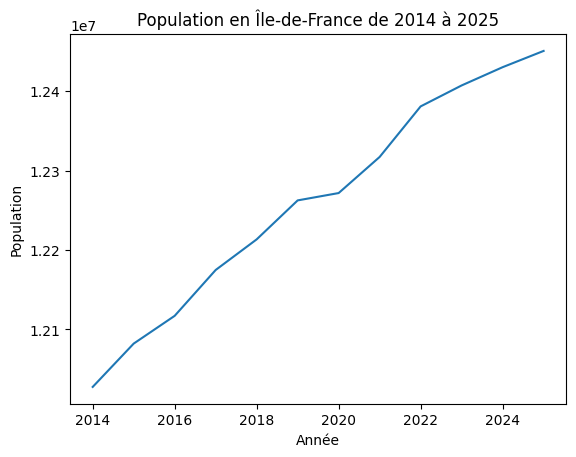

In [45]:
#graphique représentant la population en fonction du temps en Ile de France
import matplotlib.pyplot as plt 
df_idf = pop_totals[pop_totals['region_nom'] == 'Île-de-France']
plt.plot(df_idf['TIME_PERIOD'], df_idf['population'])
plt.xlabel('Année')
plt.ylabel('Population')
plt.title('Population en Île-de-France de 2014 à 2025')
plt.show()

In [ ]:
#fichier CSV final avec la population par région et par année, mis dans le dossier data
pop_totals.to_csv('population_par_region_annee.csv', index=False) 

